<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge


### Problem Statement

##### Estimate the value of a property is always a challenge as the buyer would like to buy a lower possible price while seller would like to sell at the highest possible price. As such, the company would require to establish a reliable property price estimate to help their agents.  

#### Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score


#### Loading the Data

In [2]:
#Loading df Data
house_train= pd.read_csv('../datasets/train.csv', index_col= 'Id')
#Loading the Test Data
house_kaggle = pd.read_csv('../datasets/test.csv', index_col= 'Id')

### Standard EDA

In [3]:
#looking into data header first
house_train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#Simple peek to the test data
house_kaggle.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
#looking into data shape
house_train.shape

(2051, 80)

In [6]:
#looking into data shape
house_kaggle.shape

(878, 79)

Findings
1. house_train has one more column the SalePrice, which is the Y axis 

In [7]:
# Seperate features and target variable
X_train = house_train.drop(['SalePrice'], axis=1)
y_data = house_train[['SalePrice']]

# Concatenate train and test data
# combine for keeping columns same, will be splitted up later
X = pd.concat([X_train, house_kaggle], axis=0)

In [8]:
# identify the numeric columns
house_train.select_dtypes(exclude=['object']).columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [9]:
# identidy the categorical columns
house_train.select_dtypes(include=['object']).columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [10]:
#looking into data to see are there numeric data columns became object data due to typo/error 
for col in house_train.select_dtypes(include=['object']).columns:
    print(f'{col}: {house_train[col].unique()}  \
        \nNo of Nan Values = {house_train[col].isnull().sum()} \
        \nData Type = {house_train[col].dtypes}  \
        \n--------------------------------------'\
        '---------------------------------------'\
        '---------------------------------------')

MS Zoning: ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']          
No of Nan Values = 0         
Data Type = object          
--------------------------------------------------------------------------------------------------------------------
Street: ['Pave' 'Grvl']          
No of Nan Values = 0         
Data Type = object          
--------------------------------------------------------------------------------------------------------------------
Alley: [nan 'Pave' 'Grvl']          
No of Nan Values = 1911         
Data Type = object          
--------------------------------------------------------------------------------------------------------------------
Lot Shape: ['IR1' 'Reg' 'IR2' 'IR3']          
No of Nan Values = 0         
Data Type = object          
--------------------------------------------------------------------------------------------------------------------
Land Contour: ['Lvl' 'HLS' 'Bnk' 'Low']          
No of Nan Values = 0         
Data Type = object    

Findings
1. The dataframe's numeric data does not have typo error values

In [11]:
#summary statistics for numerical columns
house_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0
BsmtFin SF 1,2050.0,4.423005e+02,4.612041e+02,0.0,0.0,368.0,7.337500e+02,5644.0


Findings
1. There is some error in the garage year built

In [12]:
house_train[house_train['Garage Yr Blt']> 2022][['Garage Yr Blt','Year Built','Year Remod/Add']]

,Garage Yr Blt,Year Built,Year Remod/Add
Id,,,
2261,2207.0,2006,2007


In [13]:
#update it with Year Remod/Add
house_train.loc[house_train['Garage Yr Blt'] > 2022,'Garage Yr Blt'] = house_train['Year Remod/Add']

#### Looking at the missing data

In [14]:
#Explore the missing data
missing_data_count = X.isnull().sum()
missing_data_percent = X.isnull().sum() / len(X) * 100
missing_data_dtype = X.dtypes

missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent,
    'Dtype': missing_data_dtype
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Missing value features:")
missing_data.head(30)

There are 27 features having missing data.

Missing value features:


,Count,Percent,Dtype
Pool QC,2916,99.556163,object
Misc Feature,2823,96.381017,object
Alley,2731,93.240014,object
Fence,2357,80.471151,object
Fireplace Qu,1422,48.548993,object
Lot Frontage,490,16.729259,float64
Garage Cond,159,5.428474,object
Garage Qual,159,5.428474,object
Garage Finish,159,5.428474,object
Garage Yr Blt,159,5.428474,float64


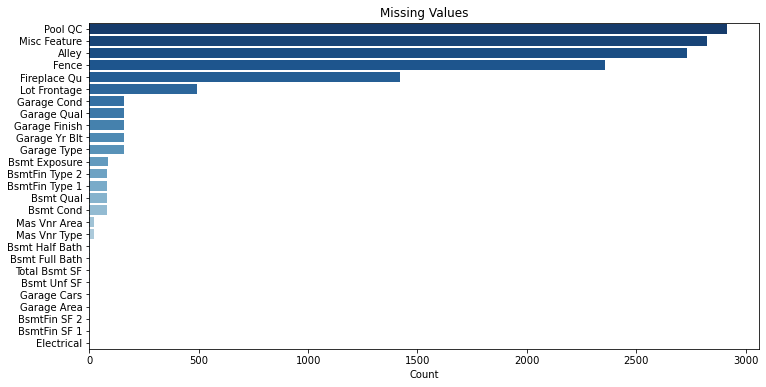

In [15]:
#plot the missing data
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_data.head(30).index,
            x=missing_data.head(30).Count,
            palette='Blues_r')
title = plt.title("Missing Values")

Findings
1. No empty nor negative values in Sales Price.

<Figure size 720x720 with 0 Axes>

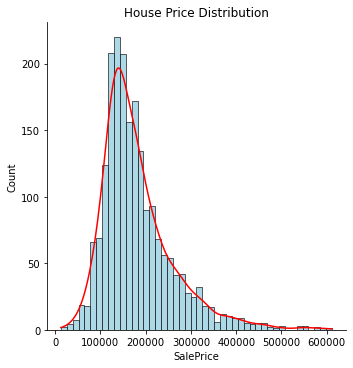

In [16]:
# A peek the sales price
plt.figure(figsize=(10,10))
sns.displot(house_train['SalePrice'],
            color='red',
            kde = True,
            facecolor='lightblue'
            )

title = plt.title("House Price Distribution")

### Data Cleaning

In [17]:
#Convert the header to simpler format
y_data.columns = [col.lower().replace(' ', '_')for col in y_data.columns]
X.columns = [col.lower().replace(' ', '_') for col in X.columns]
house_train.columns = [col.lower().replace(' ', '_') for col in house_train.columns]
print(house_train.head())
print(house_train.shape)


           pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
Id                                                                           
109  533352170           60        RL           NaN     13517   Pave   NaN   
544  531379050           60        RL          43.0     11492   Pave   NaN   
153  535304180           20        RL          68.0      7922   Pave   NaN   
318  916386060           60        RL          73.0      9802   Pave   NaN   
255  906425045           50        RL          82.0     14235   Pave   NaN   

    lot_shape land_contour utilities  ... screen_porch pool_area pool_qc  \
Id                                    ...                                  
109       IR1          Lvl    AllPub  ...            0         0     NaN   
544       IR1          Lvl    AllPub  ...            0         0     NaN   
153       Reg          Lvl    AllPub  ...            0         0     NaN   
318       Reg          Lvl    AllPub  ...            0         0     NaN 

#### Filling the missing values

##### 1. Handling the related feature (Mixture of Numeric and categorial data)

In [18]:
#identify related values data group
# A. Garage
# B. Basement
# C. Mansory Veneer

In [19]:
df= X

##### i. The Garage Group

In [20]:
#Group Garage feature related together to check missing value
garage_group = ['garage_yr_blt', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'garage_area', 'garage_cars']

print(df[garage_group].isnull().sum())                                               #checking the null values in the garage group

print("\n",df[(df.garage_area>=0) & \
                       (df.garage_yr_blt.isnull())]
                           ['garage_area'].value_counts()
     )                                                                                       #checking the unique value of garage area not null but other related feature is null 

print("\n",df[(df.garage_cars>=0) & \
                       (df.garage_yr_blt.isnull())]
                          ['garage_cars'].value_counts()
     )                                                                                       #checking the unique value of garage cars not null but other related feature is null 


c = df[df.garage_type.notnull()][garage_group]
c[c.garage_yr_blt.isnull()]                                                                  # find what is the rows that has values in garage type but not in garage year


garage_yr_blt    159
garage_type      157
garage_finish    159
garage_qual      159
garage_cond      159
garage_area        1
garage_cars        1
dtype: int64

 0.0      157
360.0      1
Name: garage_area, dtype: int64

 0.0    157
1.0      1
Name: garage_cars, dtype: int64


,garage_yr_blt,garage_type,garage_finish,garage_qual,garage_cond,garage_area,garage_cars
Id,,,,,,,
2237,NaN,Detchd,NaN,NaN,NaN,NaN,NaN
1357,NaN,Detchd,NaN,NaN,NaN,360.0,1.0


Findings
1. There is only 1 row of garage group data that has garage type information but missing the rest of the data
2. Therefore impute the missing data using modes and median

In [21]:
# imputing the data with mode and median for the row where garage__type is not null
the_median = df[df.garage_type=='Detchd'].garage_area.median()
df.loc[df.garage_type=='Detchd','garage_area'
      ] = df.loc[df.garage_type=='Detchd','garage_area'
                ].fillna(the_median)

the_median = df[df.garage_type=='Detchd'].garage_cars.median()
df.loc[df.garage_type=='Detchd','garage_cars'
      ] = df.loc[df.garage_type=='Detchd','garage_cars'
                ].fillna(the_median)


#special case for missing those that have garage but missing its year built 
df.loc[(df.garage_type.notnull()
      ) & (df.year_built.notnull()
          ) & (df.garage_yr_blt.isnull()),'garage_yr_blt'
      ] = df.loc[df.garage_type=='Detchd','garage_yr_blt'
                ].fillna(df.year_built)
    
the_median = df[df.garage_type=='Detchd'].garage_yr_blt.median()
df.loc[df.garage_type=='Detchd','garage_yr_blt'
      ] = df.loc[df.garage_type=='Detchd','garage_yr_blt'
                ].fillna(the_median)


# Group by garage_Type and fill missing value with mode where garage_Type=='Detchd' and 'NA' for the others
the_mode = df[df.garage_type=='Detchd'].garage_finish.mode()[0]
df.loc[df.garage_type=='Detchd','garage_finish'
      ] = df.loc[df.garage_type=='Detchd','garage_finish'
                ].fillna(the_mode)

the_mode = df[df.garage_type=='Detchd'].garage_qual.mode()[0]
df.loc[df.garage_type=='Detchd', 'garage_qual'
      ] = df.loc[df.garage_type=='Detchd', 'garage_qual'
                ].fillna(the_mode)

the_mode = df[df.garage_type=='Detchd'].garage_cond.mode()[0]
df.loc[df.garage_type=='Detchd', 'garage_cond'
      ] = df.loc[df.garage_type=='Detchd', 'garage_cond'
                ].fillna(the_mode)

In [22]:
# impute the rest of the missing data with NA or 0 because they does not have garage type or garage area information
df.garage_type = df.garage_type.fillna('NA')
df.garage_area = df.garage_area.fillna(0)
df.garage_cars = df.garage_cars.fillna(0)
df.garage_yr_blt = df.garage_yr_blt.fillna(0)
df.garage_finish = df.garage_finish.fillna('NA')
df.garage_qual = df.garage_qual.fillna('NA')
df.garage_cond = df.garage_cond.fillna('NA')

In [23]:
#check that there is no more null value for the garage group
print(df[garage_group].isnull().sum())

garage_yr_blt    0
garage_type      0
garage_finish    0
garage_qual      0
garage_cond      0
garage_area      0
garage_cars      0
dtype: int64


##### ii. The Basement Group

In [24]:
#Group basement feature related together to check missing value
basement_group = ['total_bsmt_sf','bsmtfin_sf_1','bsmtfin_sf_2', 'bsmt_unf_sf','bsmt_full_bath', 'bsmt_half_bath', 
        'bsmt_qual', 'bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']

print(df[basement_group].isnull().sum(),"\n")
print("\n---------------------------------------------------")
# A check for is there any row that has total_bsmt_sf > 0 and missing related features value 
for col in basement_group[1:]:
    print("\n",df[(df.total_bsmt_sf>0) & \
              (df[col].isnull())]
                 [col].value_counts()
     )
print("\n---------------------------------------------------")
# A check for is there any row that has total_bsmt_sf == 0 and related features value is not null 
for col in basement_group[1:]:
    print("\n",df[(df.total_bsmt_sf==0) & \
              (df[col].notnull())]
                 [col].value_counts()
     )
print("\n---------------------------------------------------")

total_bsmt_sf      1
bsmtfin_sf_1       1
bsmtfin_sf_2       1
bsmt_unf_sf        1
bsmt_full_bath     2
bsmt_half_bath     2
bsmt_qual         80
bsmt_cond         80
bsmt_exposure     83
bsmtfin_type_1    80
bsmtfin_type_2    81
dtype: int64 


---------------------------------------------------

 Series([], Name: bsmtfin_sf_1, dtype: int64)

 Series([], Name: bsmtfin_sf_2, dtype: int64)

 Series([], Name: bsmt_unf_sf, dtype: int64)

 Series([], Name: bsmt_full_bath, dtype: int64)

 Series([], Name: bsmt_half_bath, dtype: int64)

 Series([], Name: bsmt_qual, dtype: int64)

 Series([], Name: bsmt_cond, dtype: int64)

 Series([], Name: bsmt_exposure, dtype: int64)

 Series([], Name: bsmtfin_type_1, dtype: int64)

 Series([], Name: bsmtfin_type_2, dtype: int64)

---------------------------------------------------

 0.0    79
Name: bsmtfin_sf_1, dtype: int64

 0.0    79
Name: bsmtfin_sf_2, dtype: int64

 0.0    79
Name: bsmt_unf_sf, dtype: int64

 0.0    78
Name: bsmt_full_bath, dtype: i

In [25]:
# there is 1 missing total_bsmt_sf
df[(df.total_bsmt_sf.isnull())][basement_group]

,total_bsmt_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2
Id,,,,,,,,,,,
1342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Findings
1. Using total basement square area (total_bsmt_sf) as the main relation to determine is there a basement for the house.
2. Found that there are no row that has total_bsmt_sf > 0 and missing related feature.
3. There are no row of related feature data that has value more then 0 and total_bsmt_sf of 0.
4. There is 1 row of data that has Nan vaule for the entire basement related group feature.
5. Therefore impute the data using 0 and NA

In [26]:
# since the is no row that has Total basement Area > 0 with nan related feature value, I will impute these feature to 0 or NA
#including the 1 line of basement gorup has all feature that is Nan
for col in basement_group:
    if df[col].dtypes == 'object':
        df[col] = df[col].fillna('NA')
    else:
        df[col] = df[col].fillna(0)


In [27]:
#check that basement group has no more null
print(df[basement_group].isnull().sum())

total_bsmt_sf     0
bsmtfin_sf_1      0
bsmtfin_sf_2      0
bsmt_unf_sf       0
bsmt_full_bath    0
bsmt_half_bath    0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_type_2    0
dtype: int64


##### iii. The Masonry Veneer Group

In [28]:
#Group masonry veneer feature related together to check missing value
mas_group = ['mas_vnr_area' , 'mas_vnr_type']
print(df[mas_group].isnull().sum())

mas_vnr_area    23
mas_vnr_type    23
dtype: int64


In [29]:
# check for masonry veneer area is not null and Masonry veneer type is null

print("\n",df[(df.mas_vnr_area>0) & \
              (df['mas_vnr_type'].isnull())]
                 ['mas_vnr_type'].value_counts())


 Series([], Name: mas_vnr_type, dtype: int64)


In [30]:
# since the is no row that has masonry veneer area > 0 with nan related feature value, I will impute these feature to 0 or NA

for col in mas_group:
    if df[col].dtypes == 'object':
        df[col] = df[col].fillna('NA')
    else:
        df[col] = df[col].fillna(0)


In [31]:
#check that masonary group has no more null
print(df[mas_group].isnull().sum())

mas_vnr_area    0
mas_vnr_type    0
dtype: int64


##### 2. Handling the catergorical feature

In [32]:
#check for remainder catergorical data that has missing value
cate_data =df.select_dtypes(include=['object']).columns
checknullcols = df[cate_data].isnull().sum().sort_values(ascending=False)
print(checknullcols[checknullcols >0])


pool_qc         2916
misc_feature    2823
alley           2731
fence           2357
fireplace_qu    1422
electrical         1
dtype: int64


In [33]:
#fill up the misc_feature null value using mode
the_mode = df.misc_feature.mode()[0]
df.misc_feature = df.misc_feature.fillna(the_mode)
the_mode

'Shed'

In [34]:
#fill up the alley null value using mode
the_mode = df.alley.mode()[0]
df.alley = df.alley.fillna(the_mode)
the_mode

'Grvl'

In [35]:
#fill up the fence null value using mode
the_mode = df.fence.mode()[0]
df.fence = df.fence.fillna(the_mode)
the_mode

'MnPrv'

##### 2i. Handling the ordinal level data

In [36]:
# identify Ordinal data to do encoding

qua_cond_cols = ['exter_qual','exter_cond',
                 'bsmt_qual','bsmt_cond',
                 'heating_qc','kitchen_qual',
                 'fireplace_qu','garage_qual',
                 'garage_cond','pool_qc']

dict_values = {'Ex': 5,
               'Gd' : 4,
               'TA' : 3,
               'Fa' : 2,
               'Po' : 1,
               'NA' : 0}
               
for col in qua_cond_cols:    
    if df[col].dtypes == 'object':
        df[col] = df[col].map(dict_values).fillna(0)
    df[col] = df[col].astype(int)



In [37]:
#other ordinal data to do encode
#land_slope
col = 'land_slope'
dict_values = {'Gtl' : 3,
               'Mod' : 2,
               'Sev' : 1,
               'NA'  : 0 }
    
if df[col].dtypes == 'object':
    df[col] = df[col].map(dict_values).fillna(0)
df[col] = df[col].astype(int)


#bsmt_exposure
col = 'bsmt_exposure'
dict_values = {'Gd' : 4,
               'Av' : 3,
               'Mn' : 2,
               'No' : 1,
               'NA' : 0 }
   
if df[col].dtypes == 'object':
    df[col] = df[col].map(dict_values).fillna(0)
df[col] = df[col].astype(int)


#garage_finish
col = 'garage_finish'
dict_values = {'Fin' : 3,
               'RFn' : 2,
               'Unf' : 1,
               'NA' : 0 }
   
if df[col].dtypes == 'object':
    df[col] = df[col].map(dict_values).fillna(0)
df[col] = df[col].astype(int)

#central_aircon
col = 'central_air'
dict_values = {'Y' : 1,
               'N' : 0 }
    
if df[col].dtypes == 'object':
    df[col] = df[col].map(dict_values).fillna(0)
df[col] = df[col].astype(int)

##### 3. Handling the Numeric feature

In [38]:
# filling up the missing data with then mean for continuous data
conti_data = df.select_dtypes(exclude=['object']).columns
for col in conti_data:
    if df[col].isnull().sum()>0:
        mean_value = np.mean(df[col])
        house_train[col].fillna(mean_value)

In [39]:
#check for remainder numeric data that has missing value
conti_data = df.select_dtypes(exclude=['object']).columns
checknullcols = df[conti_data].isnull().sum().sort_values(ascending=False)
print(checknullcols[checknullcols >0])



lot_frontage    490
dtype: int64


In [40]:
the_mean = df.lot_frontage.mean()
the_mean
df.lot_frontage = df.lot_frontage.fillna(the_mean)

In [41]:
#last check see anymore null
checknullcols = df.isnull().sum().sort_values(ascending=False)
print(checknullcols[checknullcols >0])

electrical    1
dtype: int64


#### Creating Feature Engineering

In [42]:
#year sold - year built 
df['age'] = df['yr_sold'] - df['year_built']


In [43]:
df['age'].unique()

array([ 34,  13,  57,   4, 110,  44,   1,  51,  55,  38,  37, 129,   9,
         6,  92,  46,  30,  39,  18,  48,  45,  71, 112,  58,  28,  77,
        11,   2,  29,  33,  43,   0,  31,  54,  73,  68,  56,   5,  81,
        40,  41,  52,  12,  88,  47,  78,  82,  50,  97,  93,  15,  49,
        87,  32, 109,   8,  91,   7,  70,  62,  53,  83,  74,  35, 135,
        98,  59,  76,  27,  95,  19,  36,  89,  69,  24,  65, 118,  66,
         3,  42, 106,  10,  20,  22,  99,  26,  23,  60,  25,  86,  90,
        21,  84,  14,  63,  94,  72,  67, 125, 114,  61,  96,  64,  17,
       119,  16,  80, 100, 107,  79, 101, 108, 127,  85, 136, 103, 128,
       115, 117, 111,  75, 113,  -1, 126, 120, 102, 104, 122], dtype=int64)

In [44]:
df[(df['age']== -1)][['year_built','yr_sold']]

,year_built,yr_sold
Id,,
2181,2008,2007


In [45]:
df[(df['age']== -1)][['year_built','yr_sold','garage_yr_blt']]

,year_built,yr_sold,garage_yr_blt
Id,,,
2181,2008,2007,2008.0


Findings
1. there seem to have 1 record with weird sold year.
2. plausible that it is sold even before build.
3. Looking into the data, the sales type is classified as NEW

In [46]:
#year sold - year mod
df['mod_age'] = df['yr_sold'] - df['year_remod/add']

In [47]:
df['mod_age'].unique()

array([ 5, 12,  3, 17,  8,  0, 51, 55, 38, 37,  1,  2, 58, 46, 30, 39,  9,
       48, 13, 28, 56, 10, 29, 33, 34, 43, 31, 54, 49,  4,  6, 59, 40, 41,
       11, 47, 50, 57,  7, 15, 16, 53, 60, 32, 35, 14, 27, 52, 22, 19, 44,
       36, 24, 42, 45, 23, 26, 18, 25, 21, 20, -1, -2], dtype=int64)

In [48]:
df[(df['mod_age']<= -1)][['year_built','yr_sold','year_remod/add']]

,year_built,yr_sold,year_remod/add
Id,,,
1703,2007,2007,2008
2181,2008,2007,2009


In [49]:
# join the house sq foot together
df['total_sf'] = df['total_bsmt_sf'] + df['gr_liv_area'] + df['1st_flr_sf'] + df['2nd_flr_sf'] 

In [50]:
df['total_sf'].unique()

array([3683., 5157., 3171., ..., 5080., 3374., 2773.])

#### Take a look what column to drop

In [51]:
#drop unwanted column - id and pid because the ids are not building features.
drop_cols = ['pid',
             'year_built',
             'year_remod/add',             
             'total_bsmt_sf',
             'gr_liv_area',
             '1st_flr_sf',
             '2nd_flr_sf',
             'mo_sold',
            ]          
            
X.drop(drop_cols, axis=1, inplace=True)

##### Spliting X back out into X_train and house_kaggle

In [52]:
ntest = len(house_kaggle)
X_train = X.iloc[:-ntest, :]
house_kaggle = X.iloc[-ntest:, :]
print("X_train.shape:", X_train.shape)
print("house_kaggle.shape:", house_kaggle.shape)

X_train.shape: (2051, 74)
house_kaggle.shape: (878, 74)


In [53]:
#For EDA usage thuse added with saleprice
house_train = pd.concat([X_train, y_data], axis=1)

In [54]:
house_train.isnull().sum().sort_values(ascending=True)

ms_subclass      0
garage_finish    0
garage_yr_blt    0
garage_type      0
fireplace_qu     0
                ..
mas_vnr_type     0
exterior_2nd     0
exterior_1st     0
roof_style       0
saleprice        0
Length: 75, dtype: int64

### Exploratory Visualizations

#### Looking for Multicollinearity

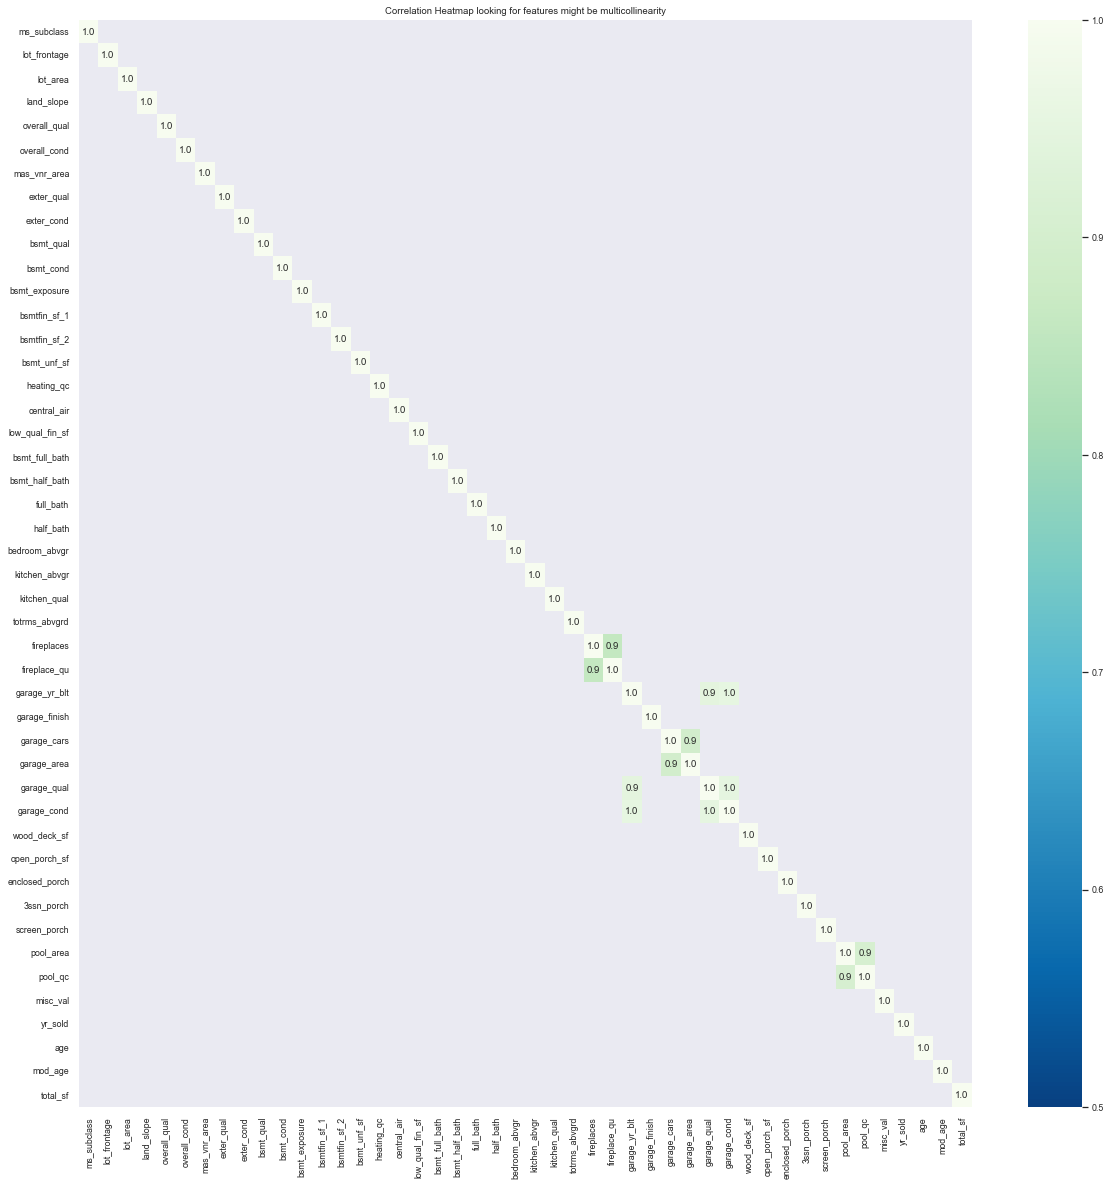

In [55]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = house_train.iloc[:, :-1].corr()
sns.set(font_scale=0.8)

# Select correlations greater than 0.75 to look for Multicollinearity 
high_corr_mat = corr_mat[abs(corr_mat) >= 0.75]

# Plot correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu_r',
            vmin=0.5,
            vmax=1,
            )
title = plt.title('Correlation Heatmap looking for features might be multicollinearity')

Findings
1. Garage_yr_built has a very strong relationship with Garage_Cond & Garage_Qual.
2. Garage_Cond has a very strong relationship with Garage_Qual
3. Garage_Area has a very strong relationship with Garage_Car (capacity).
4. Pool_QC has a very strong relationship with Pool_Area
6. Fireplaces_qu has a strong relation with Fireplace

In [56]:
# features to consider further removing due to multicollinearity
considered_features = ['garage_yr_blt',
                       'garage_qual',
                       'garage_area',
                       'pool_qc',
                       'totrms_abvgrd',
                       'fireplace_qu'
                      ]

##### Further dropping data

Multicollinearity undermines the statistical significance of an independent variable. Other things being equal, the larger the standard error of a regression coefficient, the less likely it is that this coefficient will be statistically significant. 
Note: Lasso & Ridge model helps to drop multicollinearity.

In [57]:
#further dropping the features
X_train.drop(considered_features, axis=1,inplace = True)
house_train.drop(considered_features, axis=1,inplace = True)
house_kaggle.drop(considered_features, axis=1,inplace = True)

C:\Users\CAdministrator\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### The Correlation between numeric data / Sales Price

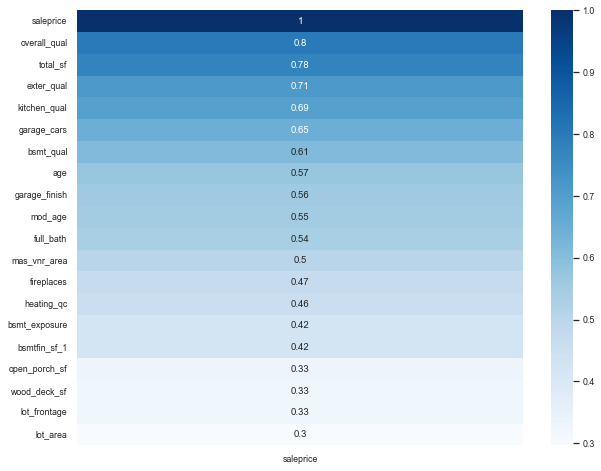

In [58]:
# checking corr with SalesPrice
plt.figure(figsize = (10,8))
price_corr = np.abs(house_train.corr()[['saleprice']]
                   ).sort_values('saleprice',ascending=False)

sns.heatmap(price_corr.head(20), cmap='Blues',annot = True)
  
# displaying heatmap
plt.show()

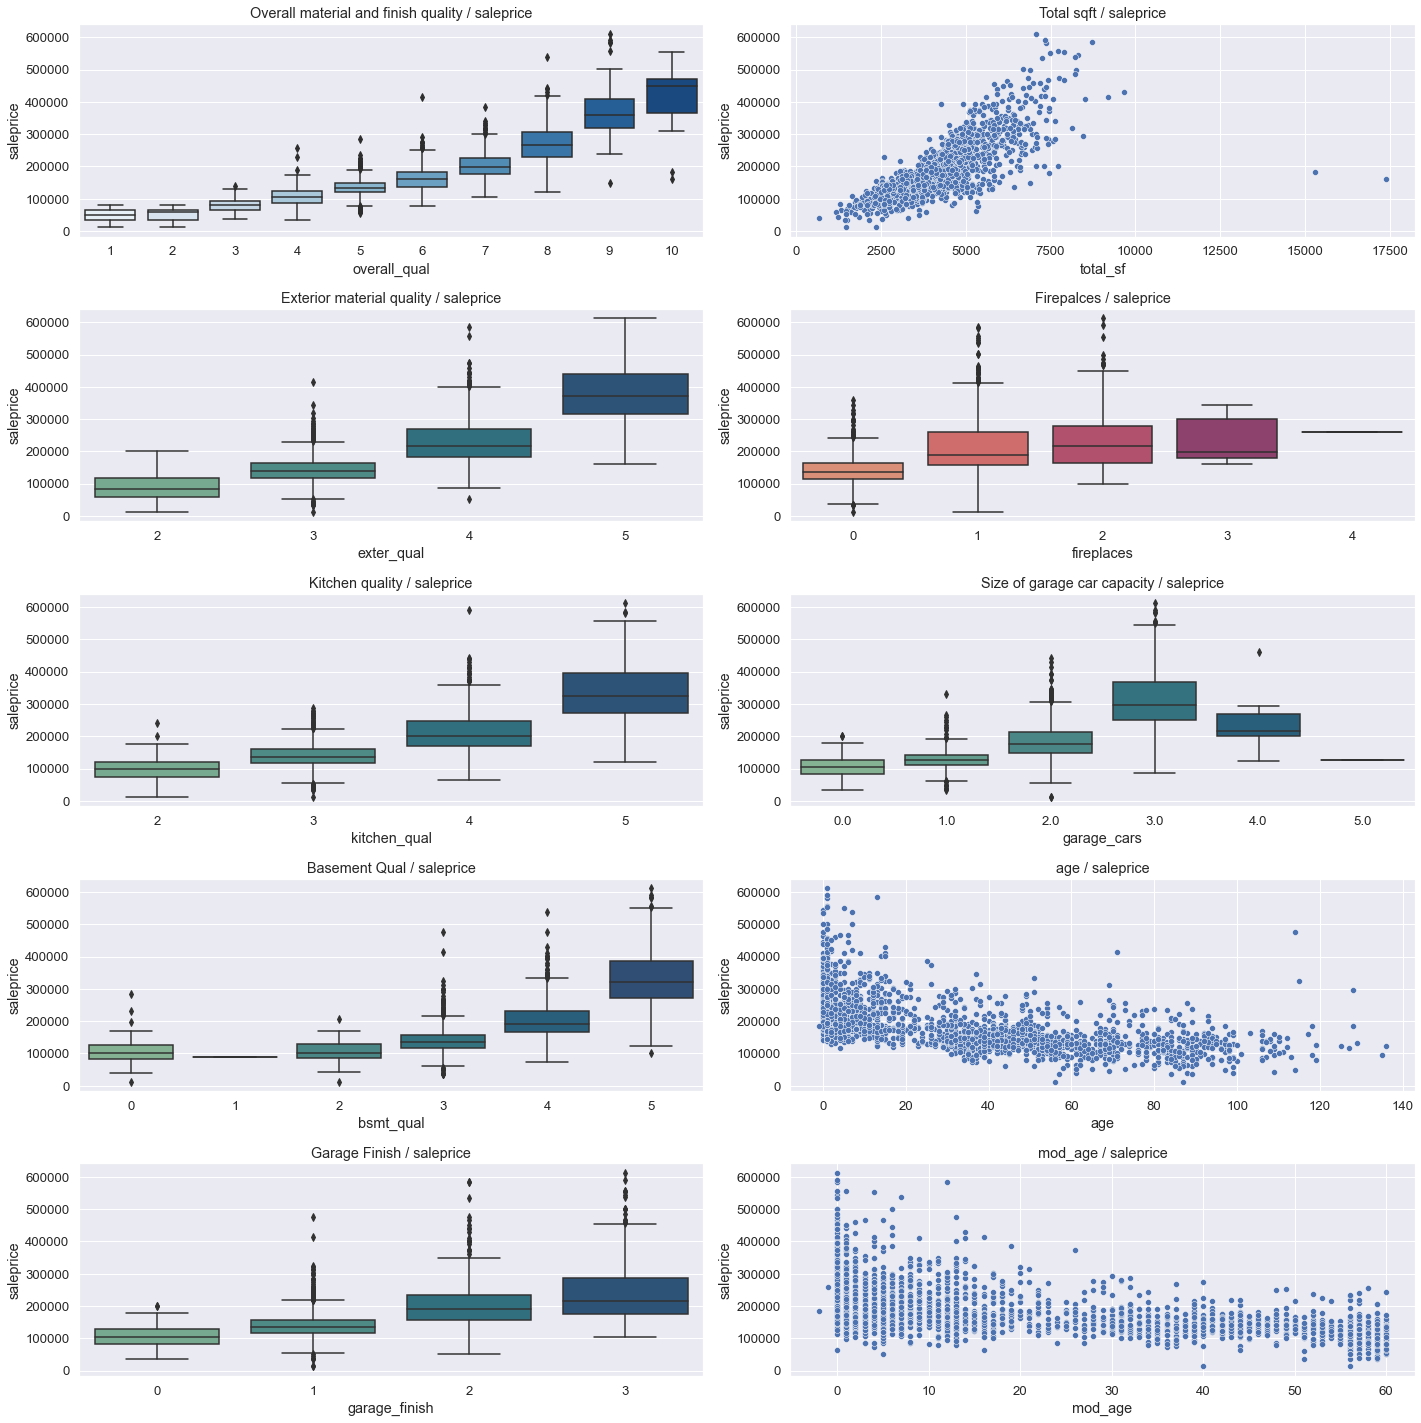

In [59]:
fig = plt.figure(figsize=(20, 20))
sns.set(font_scale=1.2)

#Box plot overall_qual/saleprice
fig1 = fig.add_subplot(5,2,1); 
sns.boxplot(x='overall_qual',
            y='saleprice',
            palette='Blues',
            data=house_train[['saleprice', 'overall_qual']])
fig1.set_title('Overall material and finish quality / saleprice')

#total_sf vs saleprice plot
fig2 = fig.add_subplot(5,2,2); 
sns.scatterplot(x = house_train.total_sf, y = house_train.saleprice, palette= 'flare')
fig2.set_title('Total sqft / saleprice')

#exter_qual vs saleprice plot
fig3 = fig.add_subplot(5,2,3); 
sns.boxplot(x=house_train.exter_qual, 
            y=house_train.saleprice,
            palette='crest',
            data=house_train[['exter_qual', 'saleprice']])
fig3.set_title('Exterior material quality / saleprice')

#gr_liv_area vs saleprice plot
fig4 = fig.add_subplot(5,2,4); 
sns.boxplot(x = house_train.fireplaces,
            y = house_train.saleprice,
            palette= 'flare',
            data=house_train[['fireplaces', 'saleprice']])
fig4.set_title('Firepalces / saleprice')

#kitchen_qual vs saleprice plot
fig5 = fig.add_subplot(5,2,5); 
sns.boxplot(x=house_train.kitchen_qual, 
            y=house_train.saleprice,
            palette='crest',
            data=house_train[['kitchen_qual', 'saleprice']])
fig5.set_title('Kitchen quality / saleprice')

#garage_area vs saleprice plot
fig6 = fig.add_subplot(5,2,6); 
sns.boxplot(x = house_train.garage_cars,
            y = house_train.saleprice,
            palette= 'crest')
fig6.set_title('Size of garage car capacity / saleprice')

#total_bsmt_sf vs saleprice plot
fig7 = fig.add_subplot(5,2,7); 
sns.boxplot(x = house_train.bsmt_qual, 
            y = house_train.saleprice ,  
            palette='crest',
            data=house_train[['bsmt_qual', 'saleprice']])
fig7.set_title('Basement Qual / saleprice')

#1st_flr_sf vs saleprice plot
fig8 = fig.add_subplot(5,2,8); 
sns.scatterplot(x = house_train['age'],
                y = house_train.saleprice,
                palette= 'flare')
fig8.set_title('age / saleprice')

#total_bsmt_sf vs saleprice plot
fig9 = fig.add_subplot(5,2,9); 
sns.boxplot(x = house_train.garage_finish, 
            y = house_train.saleprice ,  
            palette='crest',
            data=house_train[['garage_finish', 'saleprice']])
fig9.set_title('Garage Finish / saleprice')

#1st_flr_sf vs saleprice plot
fig10 = fig.add_subplot(5,2,10); 
sns.scatterplot(x = house_train['mod_age'], y = house_train.saleprice, palette= 'flare')
fig10.set_title('mod_age / saleprice')

plt.tight_layout(); plt.show()

##### Outlier Peeking (*Can Skip, my Data processing working)

In [60]:
house_train[(house_train.total_sf > 15000)
                           & (house_train.saleprice < 200000)].index

Int64Index([1499, 2181], dtype='int64', name='Id')

In [61]:
house_train[(house_train.age > 110)
                           & (house_train.saleprice > 290000)].index

Int64Index([2667, 1321, 1307], dtype='int64', name='Id')

In [62]:
house_train[(house_train.garage_cars > 3)
                           & (house_train.saleprice > 400000)].index

Int64Index([1060], dtype='int64', name='Id')

In [63]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(house_train.loc[[2667, 1321, 1307,1060,1323,851,1499, 2181]])

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,heating,heating_qc,central_air,electrical,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_feature,misc_val,yr_sold,sale_type,age,mod_age,total_sf,saleprice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2667,75,RM,90.0,22950,Pave,Grvl,IR2,Lvl,AllPub,Inside,3,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,4,4,BrkTil,3,3,2,Unf,0.0,Unf,0.0,1107.0,GasA,5,1,SBrkr,572,0.0,0.0,2,1,4,1,5,Typ,2,Detchd,1,3.0,3,Y,0,260,0,0,410,0,GdPrv,Shed,0,2006,WD,114,13,7751.0,475000
1321,75,RM,75.0,13500,Pave,Grvl,Reg,Lvl,AllPub,Inside,3,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,5,5,BrkTil,3,3,1,Unf,0.0,Unf,0.0,1237.0,GasA,4,1,SBrkr,0,0.0,0.0,3,1,3,1,4,Typ,1,Detchd,1,2.0,3,Y,105,502,0,0,0,0,MnPrv,Shed,0,2008,WD,115,8,6787.0,325000
1307,75,RM,87.0,18386,Pave,Grvl,Reg,Lvl,AllPub,Inside,3,OldTown,Norm,Norm,1Fam,2.5Fin,7,9,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,BrkTil,3,3,1,Unf,0.0,Unf,0.0,1470.0,GasA,5,1,SBrkr,0,0.0,0.0,3,0,3,1,4,Typ,1,Attchd,1,3.0,3,Y,302,0,0,0,0,0,MnPrv,Shed,0,2008,WD,128,6,8456.0,295000
1060,60,RL,96.0,12539,Pave,Grvl,Reg,Lvl,AllPub,Inside,3,NridgHt,PosN,Norm,1Fam,2Story,10,5,Hip,CompShg,CemntBd,CmentBd,BrkFace,468.0,5,3,PConc,5,3,4,GLQ,1082.0,Unf,0.0,538.0,GasA,5,1,SBrkr,0,1.0,0.0,2,1,4,1,5,Typ,1,BuiltIn,3,4.0,3,Y,30,200,0,0,192,0,MnPrv,Shed,0,2008,WD,3,2,7200.0,460000
1323,70,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,3,OldTown,Norm,Norm,1Fam,2Story,7,7,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,3,2,Unf,0.0,Unf,0.0,1313.0,GasW,4,1,SBrkr,0,0.0,0.0,2,0,5,1,3,Typ,1,Detchd,1,2.0,2,Y,0,299,0,0,0,0,MnPrv,Shed,0,2008,WD,118,9,6303.0,184000
851,20,RL,65.0,10739,Pave,Grvl,IR1,Lvl,AllPub,Inside,3,CollgCr,Norm,Norm,1Fam,1Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,4,3,PConc,4,3,1,GLQ,1259.0,Unf,0.0,172.0,GasA,5,1,SBrkr,0,1.0,0.0,2,0,3,1,4,Typ,0,Attchd,2,2.0,3,Y,144,40,0,0,0,0,MnPrv,Shed,0,2009,WD,7,8,4319.0,203000
1499,60,RL,313.0,63887,Pave,Grvl,IR3,Bnk,AllPub,Corner,3,Edwards,Feedr,Norm,1Fam,2Story,10,5,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5,3,4,GLQ,5644.0,Unf,0.0,466.0,GasA,5,1,SBrkr,0,2.0,0.0,2,1,3,1,5,Typ,3,Attchd,3,2.0,3,Y,214,292,0,0,0,480,MnPrv,Shed,0,2008,New,0,0,17394.0,160000
2181,20,RL,128.0,39290,Pave,Grvl,IR1,Bnk,AllPub,Inside,3,Edwards,Norm,Norm,1Fam,1Story,10,5,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,5,3,PConc,5,3,4,GLQ,4010.0,Unf,0.0,1085.0,GasA,5,1,SBrkr,0,1.0,1.0,2,1,2,1,5,Typ,2,Attchd,3,3.0,3,Y,546,484,0,0,0,0,MnPrv,Elev,17000,2007,New,-1,-2,15285.0,183850


In [64]:
house_train[(house_train.age > 110)
                           & (house_train.saleprice < 290000)
           & (house_train.total_sf < 6000)].index

Int64Index([ 807, 2243,  216,  190,  308, 1951,  666, 1996,  724, 1319, 1998,
            1299, 2002,  716, 1555],
           dtype='int64', name='Id')

In [65]:
house_train[(house_train.kitchen_qual >= 4)
                           & (house_train.saleprice > 580000)].index

Int64Index([45, 2451, 434, 1638], dtype='int64', name='Id')

In [66]:
house_train[(house_train.mod_age > house_train.age)].index

Int64Index([851], dtype='int64', name='Id')

In [67]:
house_train[(house_train.overall_qual == 10)
                           & (house_train.saleprice > 400000) &(house_train.neighborhood == 'StoneBr')
           ][['total_sf','saleprice','age']]

,total_sf,saleprice,age
Id,,,
2331,8308.0,545224,0
1643,5826.0,455000,1
2337,7300.0,438780,0
2335,7246.0,535000,0


In [68]:
house_train[(house_train.overall_qual >= 9)
                           & (house_train.saleprice > 400000) &(house_train.neighborhood == 'StoneBr')
           ][['total_sf','saleprice','age','overall_qual']]

,total_sf,saleprice,age,overall_qual
Id,,,,
367,6684.0,501837,1,9
2331,8308.0,545224,0,10
2333,7728.0,556581,1,9
2330,6994.0,457347,1,9
1643,5826.0,455000,1,10
2337,7300.0,438780,0,10
2335,7246.0,535000,0,10
1638,7336.0,591587,1,9


In [69]:
house_train[(house_train['overall_qual'] >= 5) & (house_train['saleprice'] >=450000)].sort_values('saleprice',ascending=[0])[['total_sf','saleprice','age','overall_qual','neighborhood']][:5]
# house_train.groupby(['neighborhood','overall_qual'])[['total_sf','saleprice','age','overall_qual','neighborhood']]

# df[df['marital_status']=='married'].groupby('job').agg( {"age":"mean"} )

,total_sf,saleprice,age,overall_qual,neighborhood
Id,,,,,
45,7058.0,611657,1,9,NridgHt
1638,7336.0,591587,1,9,StoneBr
2451,8733.0,584500,13,9,NoRidge
434,7378.0,582933,1,9,NridgHt
2333,7728.0,556581,1,9,StoneBr


#### The Correlation between catergorical data / Sales Price

In [70]:
cate_data =df.select_dtypes(include=['object']).columns

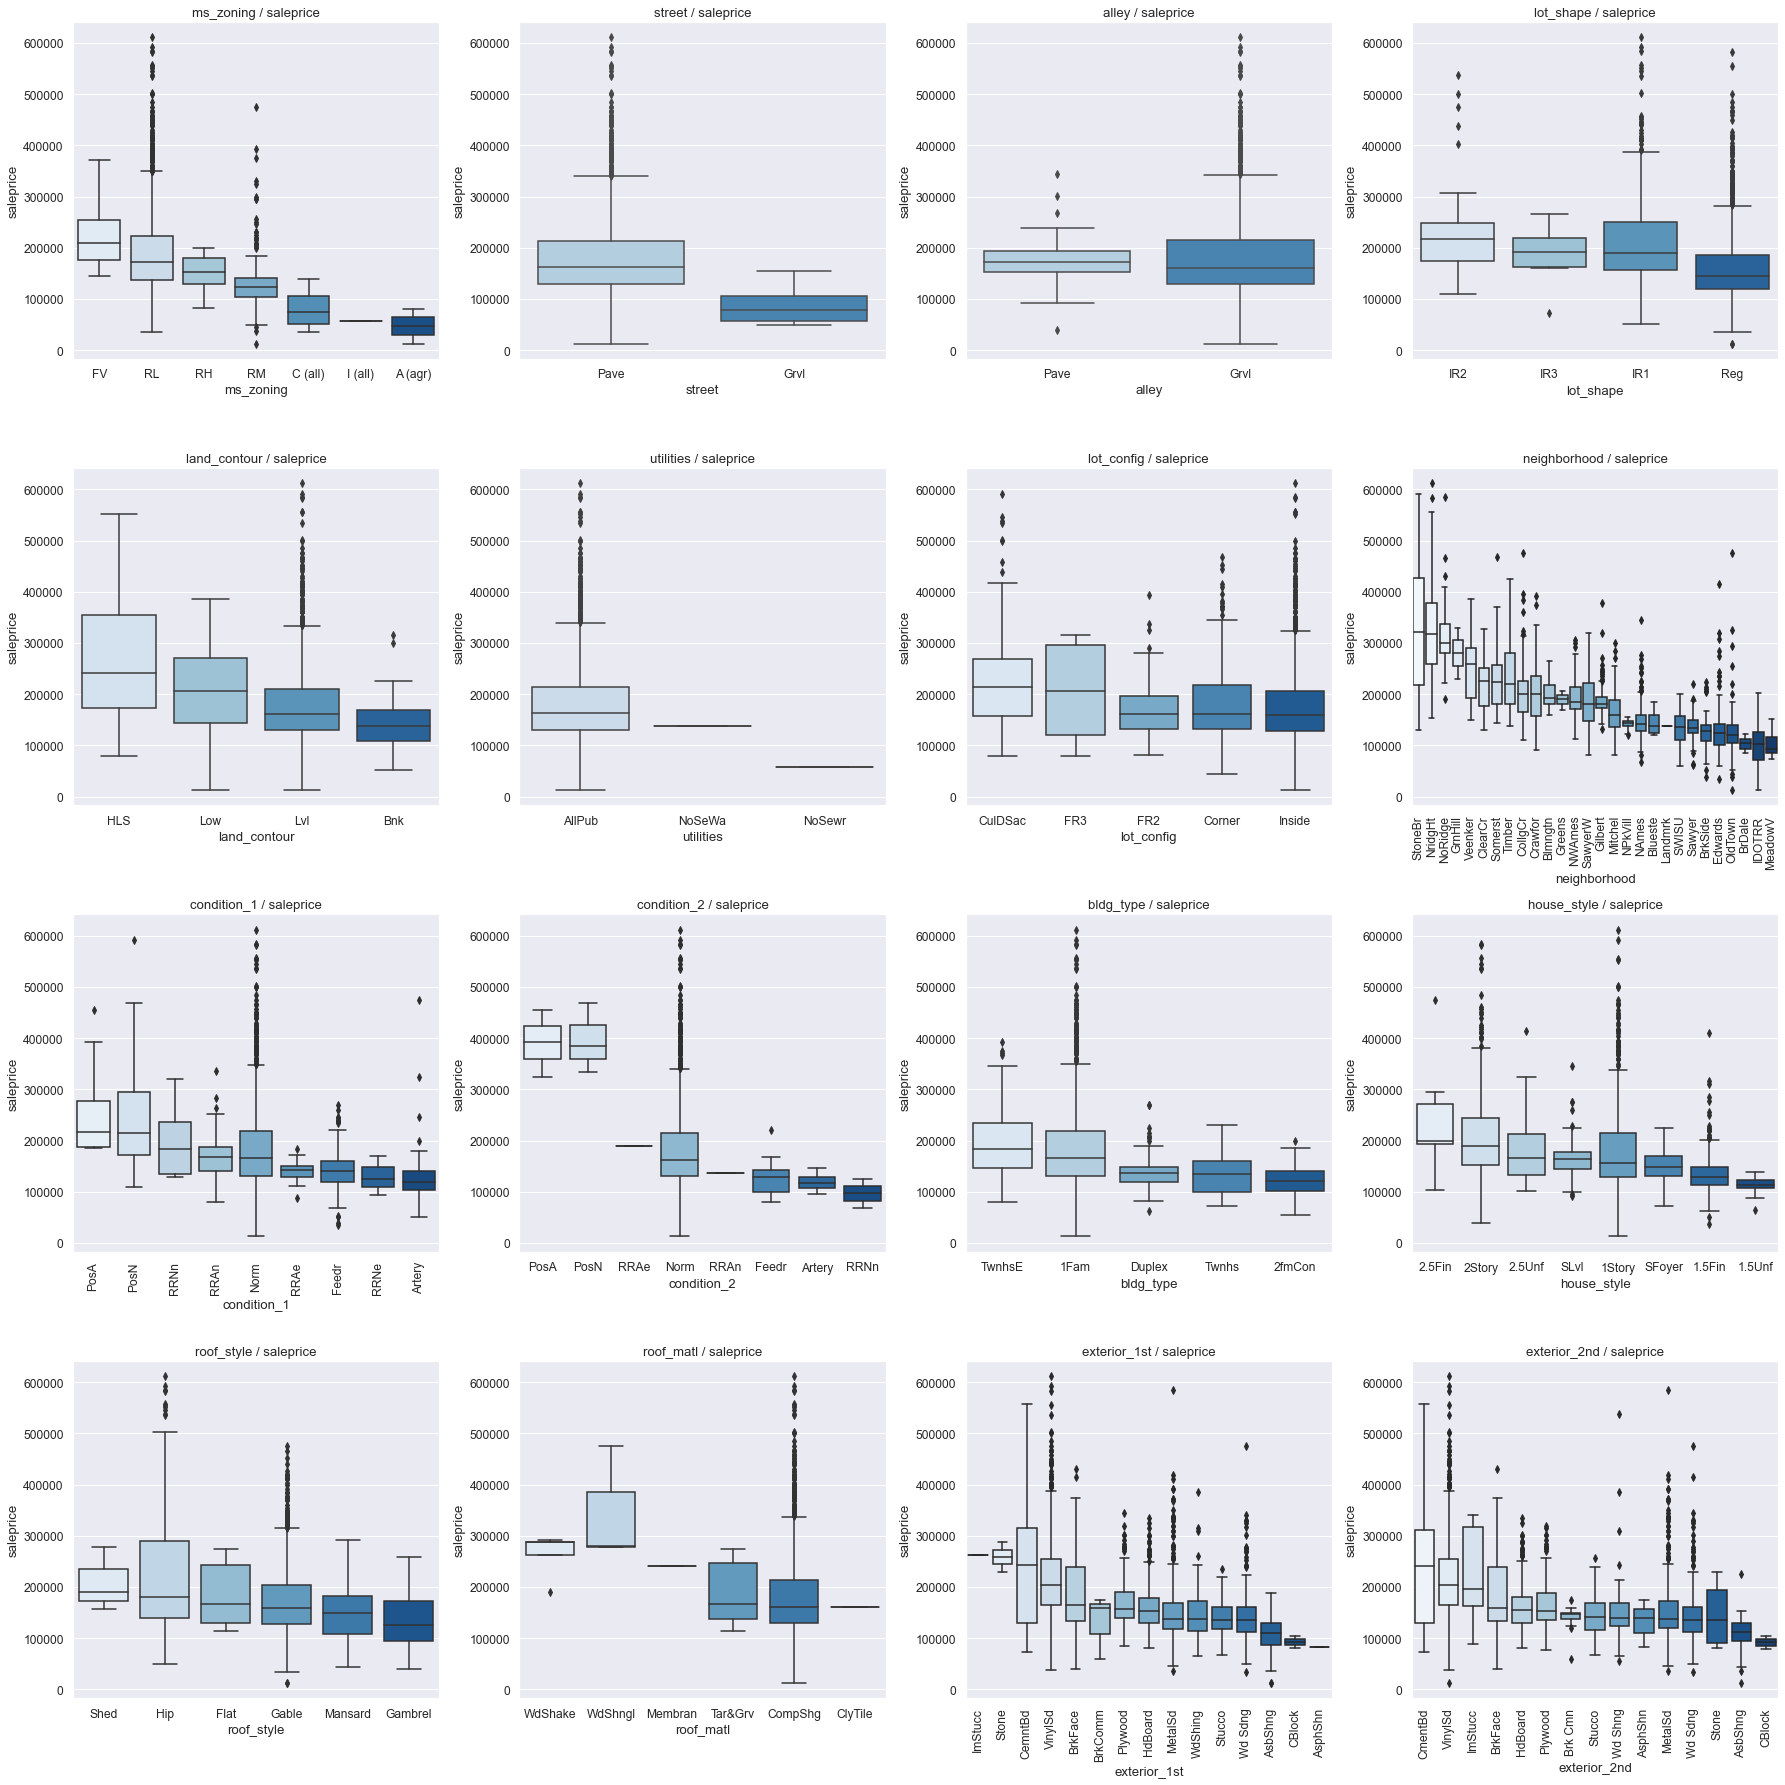

In [71]:
fig = plt.figure(figsize=(25, 25))
sns.set(font_scale=1.1)

sub_cate_data = house_train[cate_data].iloc[:,:16]
for i, feat in enumerate(sub_cate_data):
    #Box plot overall_qual/saleprice
    feat=feat
    plt_id = 1 + i
    feature_order = house_train.groupby(
        [feat]).median().saleprice.sort_values(ascending=False).index

    fig1 = fig.add_subplot(4,4,plt_id);
    sns.boxplot(x=feat,
                y='saleprice',
                order=feature_order,
                palette='Blues',
                data=house_train[['saleprice', feat]])
    fig1.set_title(f'{feat} / saleprice')
    if len(np.unique(house_train[feat]))>=9:
        tick = plt.xticks(rotation=90)
    
plt.tight_layout(); plt.show()

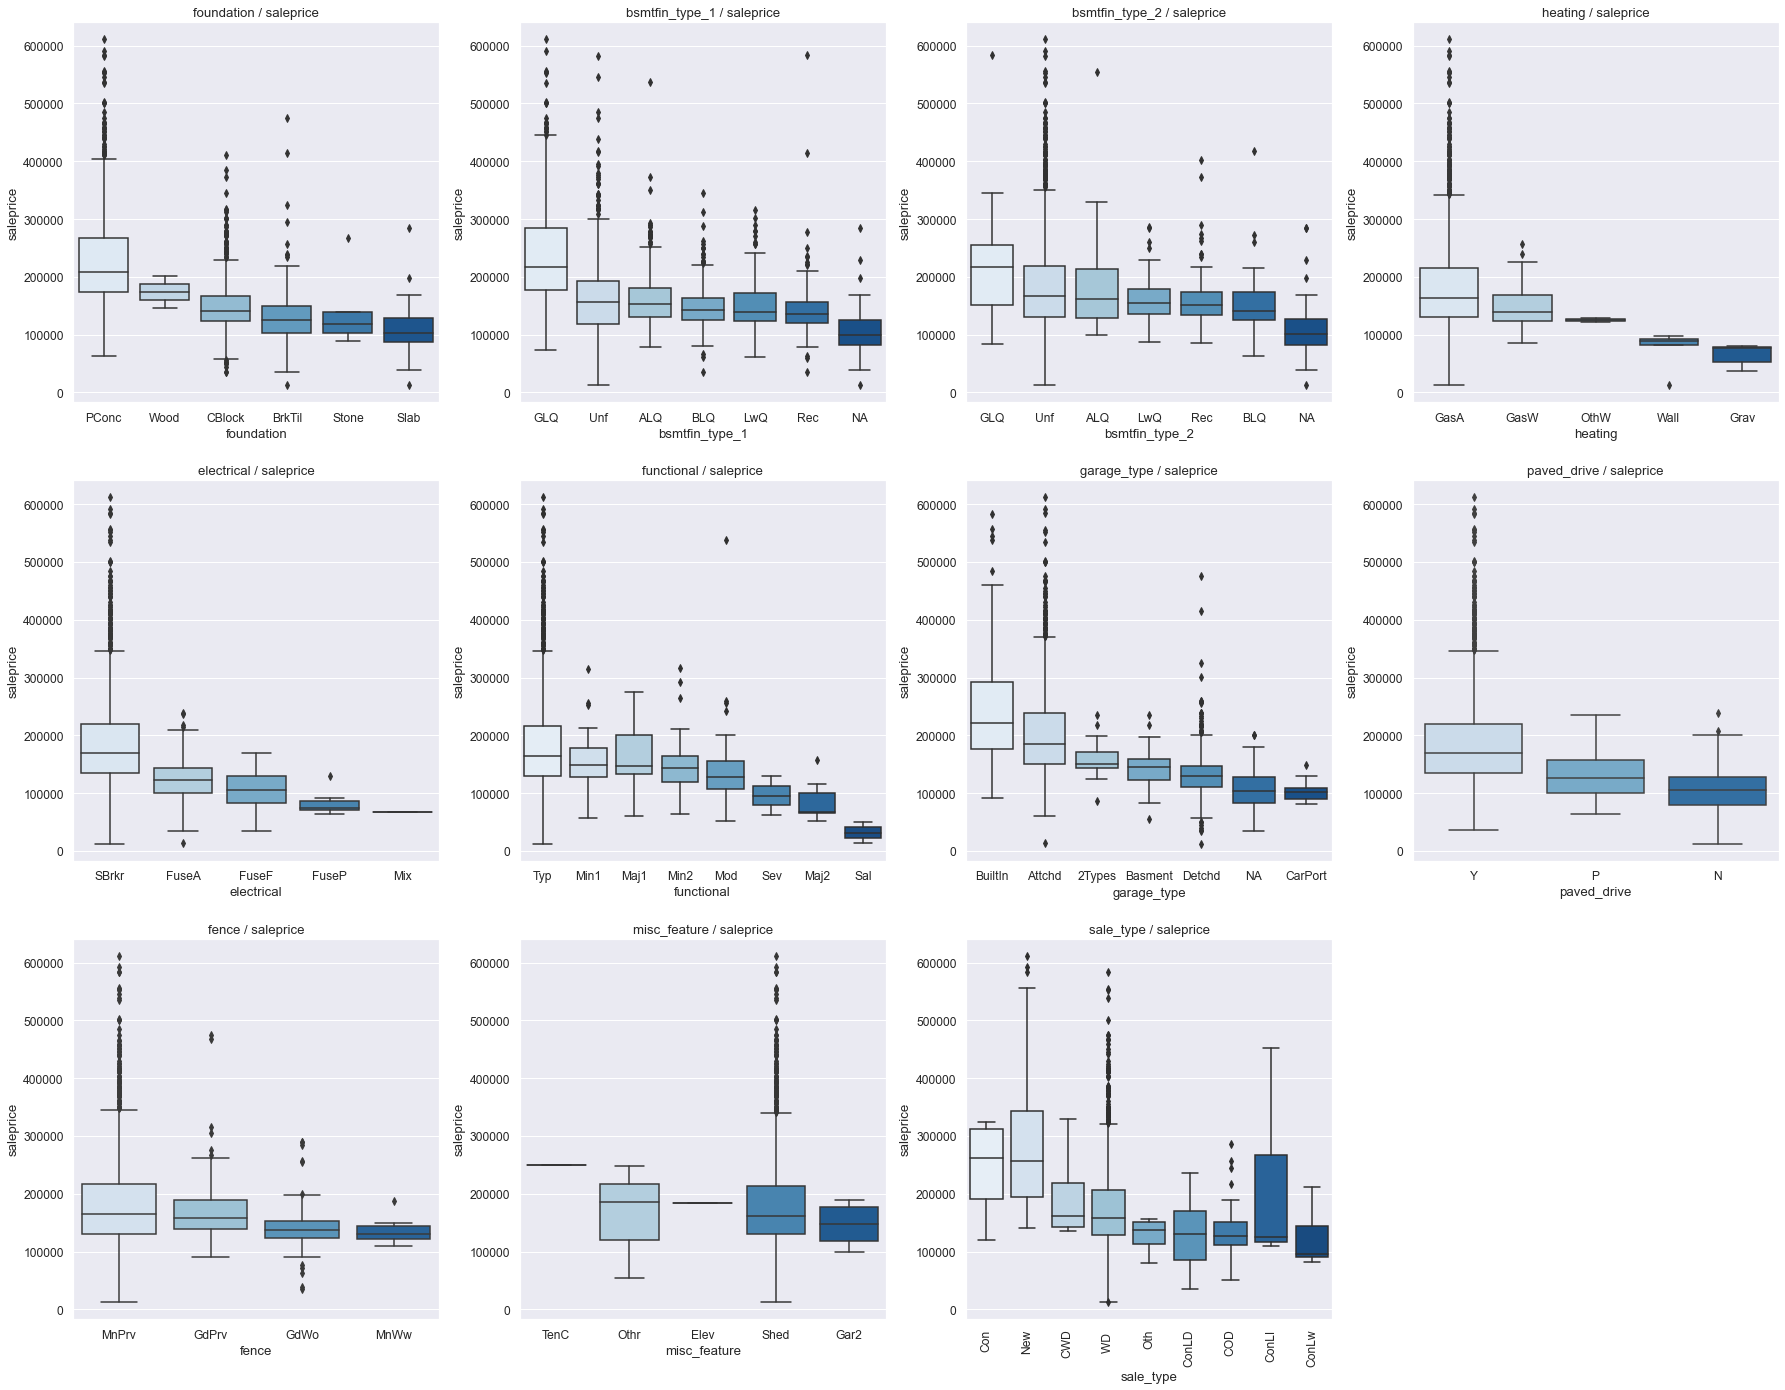

In [72]:
fig = plt.figure(figsize=(25, 25))
sns.set(font_scale=1.1)

sub_cate_data = house_train[cate_data].iloc[:,17:33]
for i, feat in enumerate(sub_cate_data):
    #Box plot overall_qual/saleprice
    feat=feat
    plt_id = 1 + i
    feature_order = house_train.groupby(
        [feat]).median().saleprice.sort_values(ascending=False).index

    fig1 = fig.add_subplot(4,4,plt_id);
    sns.boxplot(x=feat,
                y='saleprice',
                order=feature_order,
                palette='Blues',
                data=house_train[['saleprice', feat]])
    fig1.set_title(f'{feat} / saleprice')
    if len(np.unique(house_train[feat]))>=9:
        tick = plt.xticks(rotation=90)
    
plt.tight_layout(); plt.show()

In [73]:
#outliners 1
outlier_index = house_train[(house_train.total_sf > 15000)
                           & (house_train.saleprice < 200000)].index
X_train.drop(outlier_index, axis=0, inplace=True)
house_train.drop(outlier_index, axis=0, inplace=True)
y_data.drop(outlier_index, axis=0, inplace=True)

C:\Users\CAdministrator\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
#outliners 2
outlier_index = house_train[(house_train.garage_cars > 3)
                           & (house_train.saleprice > 400000)].index
outlier_index
X_train.drop(outlier_index, axis=0, inplace=True)
house_train.drop(outlier_index, axis=0, inplace=True)
y_data.drop(outlier_index, axis=0, inplace=True)

In [75]:
#outliners 3
outlier_index = house_train[(house_train.age > 110)
                           & (house_train.saleprice > 290000)].index
outlier_index
X_train.drop(outlier_index, axis=0, inplace=True)
house_train.drop(outlier_index, axis=0, inplace=True)
y_data.drop(outlier_index, axis=0, inplace=True)

In [76]:
#outliners 4
outlier_index = house_train[(house_train.mod_age < 0)
                           ].index
outlier_index
X_train.drop(outlier_index, axis=0, inplace=True)
house_train.drop(outlier_index, axis=0, inplace=True)
y_data.drop(outlier_index, axis=0, inplace=True)

### Pre-processing

#### Make Dummies - One Hot Encoding

In [77]:
#before one code, update X_train with preprocessed house_train data and drop saleprice
X_train = house_train.drop(['saleprice'], axis=1)

In [78]:
print(house_train.shape)
print(house_kaggle.shape)
print(X_train.shape)
house_train.columns.difference(house_kaggle.columns)

(2044, 69)
(878, 68)
(2044, 68)


Index(['saleprice'], dtype='object')

In [79]:
#Creating Dummies
house_kaggle = pd.get_dummies(house_kaggle, drop_first=True)
print("house_kaggle.shape:", house_kaggle.shape)
X_train = pd.get_dummies(X_train, drop_first=True)
print("X_train.shape:", X_train.shape)

house_kaggle.shape: (878, 196)
X_train.shape: (2044, 208)


Findings
After one hot encoding, the columns does not match because there are different unique values in the columns between house_kaggle and house_train.

##### Dropping columns between X_train and house_kaggle

In [80]:
#finding the difference in the columns
extra_coln = X_train.columns.difference(house_kaggle.columns)
print(extra_coln)
extra_coln2 = house_kaggle.columns.difference(X_train.columns)
print(extra_coln2)

Index(['condition_2_Feedr', 'condition_2_PosN', 'condition_2_RRAe',
       'condition_2_RRAn', 'condition_2_RRNn', 'electrical_Mix',
       'exterior_1st_CBlock', 'exterior_1st_ImStucc', 'exterior_1st_Stone',
       'exterior_2nd_Stone', 'functional_Sal', 'functional_Sev',
       'heating_OthW', 'heating_Wall', 'misc_feature_TenC',
       'ms_zoning_C (all)', 'neighborhood_GrnHill', 'neighborhood_Landmrk',
       'roof_matl_Membran', 'utilities_NoSeWa'],
      dtype='object')
Index(['exterior_1st_PreCast', 'exterior_2nd_Other', 'exterior_2nd_PreCast',
       'heating_GasA', 'mas_vnr_type_CBlock', 'roof_matl_Metal',
       'roof_matl_Roll', 'sale_type_VWD'],
      dtype='object')


In [81]:
#drop the extra columns in X_train & house_kaggle
X_train.drop(extra_coln,axis = 1,inplace = True)
house_kaggle.drop(extra_coln2,axis = 1,inplace = True)

In [82]:
print("house_kaggle.shape:", house_kaggle.shape)
print("X_train.shape:", X_train.shape)
print("y_data.shape:", y_data.shape)

house_kaggle.shape: (878, 188)
X_train.shape: (2044, 188)
y_data.shape: (2044, 1)


In [83]:
# #My Top64 corr feature
X_corr_top64 = list(pd.concat([X_train, y_data], axis=1).corr()['saleprice'].sort_values(ascending=False).index[1:65])
#extra_coln64 = house_kaggle.columns.difference(X_train[X_corr_top64].columns)
#house_kaggle.drop(extra_coln64,axis = 1,inplace = True)

In [84]:
X_train[X_corr_top64].head()

,total_sf,overall_qual,exter_qual,kitchen_qual,garage_cars,bsmt_qual,garage_finish,full_bath,foundation_PConc,mas_vnr_area,...,fence_MnPrv,condition_1_PosN,neighborhood_CollgCr,neighborhood_Veenker,condition_1_PosA,mas_vnr_type_NA,street_Pave,roof_matl_WdShngl,bldg_type_TwnhsE,neighborhood_Crawfor
Id,,,,,,,,,,,,,,,,,,,,,
109,3683.0,6,4,4,2.0,3,2,2,0,289.0,...,1,0,0,0,0,0,1,0,0,0
544,5157.0,7,4,4,2.0,4,2,2,1,132.0,...,1,0,0,0,0,0,1,0,0,0
153,3171.0,5,3,4,1.0,3,1,1,0,0.0,...,1,0,0,0,0,0,1,0,0,0
318,3272.0,5,3,3,2.0,4,3,2,1,0.0,...,1,0,0,0,0,0,1,0,0,0
255,3566.0,6,3,3,2.0,2,1,2,1,0.0,...,1,0,0,0,0,0,1,0,0,0


In [85]:
# #My Top32 corr feature
X_corr_top32 = list(pd.concat([X_train, y_data], axis=1).corr()['saleprice'].sort_values(ascending=False).index[1:33])
#extra_coln32 = house_kaggle.columns.difference(X_train[X_corr_top32].columns)
#house_kaggle.drop(extra_coln32,axis = 1,inplace = True)

In [86]:
X_train[X_corr_top32].head()

,total_sf,overall_qual,exter_qual,kitchen_qual,garage_cars,bsmt_qual,garage_finish,full_bath,foundation_PConc,mas_vnr_area,...,open_porch_sf,mas_vnr_type_Stone,lot_area,paved_drive_Y,bsmt_full_bath,half_bath,central_air,roof_style_Hip,neighborhood_NoRidge,garage_cond
Id,,,,,,,,,,,,,,,,,,,,,
109,3683.0,6,4,4,2.0,3,2,2,0,289.0,...,44,0,13517,1,0.0,1,1,0,0,3
544,5157.0,7,4,4,2.0,4,2,2,1,132.0,...,74,0,11492,1,1.0,1,1,0,0,3
153,3171.0,5,3,4,1.0,3,1,1,0,0.0,...,52,0,7922,1,1.0,0,1,0,0,3
318,3272.0,5,3,3,2.0,4,3,2,1,0.0,...,0,0,9802,1,0.0,1,1,0,0,3
255,3566.0,6,3,3,2.0,2,1,2,1,0.0,...,59,0,14235,0,0.0,0,1,0,0,3


#### Train/test split my data

In [87]:
#train - Split
#X_train, X_val, y_train, y_val = train_test_split(X_train[X_corr_top32], y_data, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train[X_corr_top64], y_data, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_data, random_state=42)

In [88]:
#listing in the feature
feat = X_train.columns.tolist()

In [89]:
#just a check on train split 
X_train.shape, y_train.shape

((1533, 188), (1533, 1))

In [90]:
#just a check on val split
X_val.shape, y_val.shape

((511, 188), (511, 1))

#### Scale the data to standardize it

In [91]:
# Scale our data.
# Relabeling scaled data as "Z"
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_val = ss.transform(X_val)

In [92]:
Z_house_kaggle = ss.transform(house_kaggle)

### Modeling

#### Linear Regression 

In [93]:
# Instantiate/Fit Model
lr = LinearRegression()
lr.fit(Z_train, y_train)

LinearRegression()

In [94]:
# Train Score -R2
lr.score(Z_train, y_train)


0.9324885036989773

In [95]:
# Test Score -R2
lr.score(Z_val, y_val)

-805842475564.937

In [96]:
# Cross Val Score = baseline 𝑅2
print(f'The LinearRegression R2 Train Score is: {cross_val_score(lr, Z_train, y_train,cv=10).mean()}')
print(f'The LinearRegression R2 Test Score is: {cross_val_score(lr, Z_val, y_val,cv=10).mean()}')

The LinearRegression R2 Train Score is: -1.5115023719228283e+24
The LinearRegression R2 Test Score is: -1.716890807046665e+22


The R2 score goes into very huge negative, meaning that the model is very bad. When I drop the feature to only top 32, the score is shown as below.

<img src="../image/lr_top32_score.JPG" style="float: left; margin: 20px; height: 100px">

In [97]:
# coefficients
#lr.coef_

In [98]:
# y intercept
lr.intercept_

array([181996.83105023])

The value for the intercept term in this model is 181,996 when the features are all zero which in this case does not make sense to interpret it shall just stay as a constant.

In [99]:
# get predictions from our X data
predictions = lr.predict(Z_train)
y_train[:5], predictions[:5]

(      saleprice
 Id             
 1962     129000
 1972     125500
 1105     290000
 892      320000
 2772     193000,
 array([[132597.52067132],
        [121815.95467579],
        [308326.45673992],
        [306766.09528348],
        [206267.26186115]]))

In [100]:
# get predictions from our X data
predictions_v = lr.predict(Z_val)
y_val[:5], predictions_v[:5]

(      saleprice
 Id             
 2140     120000
 2841     116000
 319      269500
 1642     441929
 2609     165000,
 array([[151808.85844096],
        [ 82167.74346366],
        [248498.50411688],
        [411481.74383117],
        [137453.8199432 ]]))

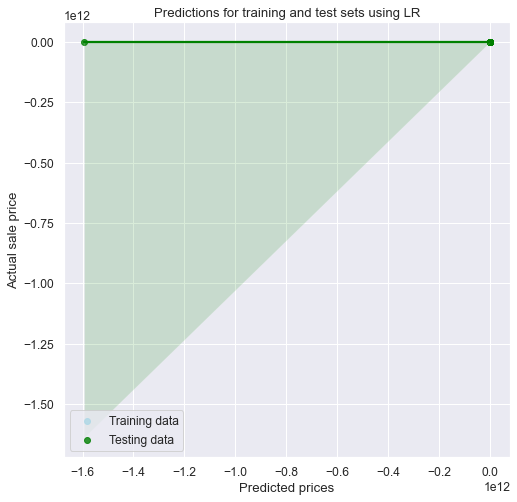

In [101]:
plt.figure(figsize=(8, 8))
plt.title("Predictions for training and test sets using LR")
sns.regplot(x = predictions, y = y_train, data=X_train, color='LightBlue', label = "Training data")
sns.regplot(x = predictions_v, y = y_val, data=X_val, color='Green' , label = "Testing data")
plt.xlabel("Predicted prices")
plt.ylabel("Actual sale price")
plt.legend();

The model fit very badly against the Z_val

In [102]:
# MSE using sklearn
print(f'MSE on training set: {metrics.mean_squared_error(y_train, predictions)}')

MSE on training set: 419086940.5582534


In [103]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_train, predictions))

20471.61304241201

In [104]:
# MAE
metrics.mean_absolute_error(y_train, predictions)

14362.023192324481

In [105]:
# R2
print(f'R^2 on training set: {metrics.r2_score(y_train, predictions)}')

R^2 on training set: 0.9324885036989773


#### Lasso

In [106]:
#Lasso
lasso_cv = LassoCV(n_alphas=200) # to find what is the optimum value of alpha
lasso_cv.fit(Z_train, y_train.values.ravel())
lasso = Lasso(alpha=lasso_cv.alpha_) # assign the optimun alpha into lasso

lasso_scores_t = cross_val_score(lasso, Z_train, y_train, cv=10)
print(f'The Lasso R2 Train Score is: {lasso_scores_t.mean()}')
lasso_scores_v = cross_val_score(lasso, Z_val, y_val, cv=10)
print(f'The Lasso R2 Test Score is: {lasso_scores_v.mean()}')

The Lasso R2 Train Score is: 0.9065165705518995
The Lasso R2 Test Score is: 0.9055386158397685


#### Ridge

In [107]:
#ridge
ridge_cv = RidgeCV(alphas=np.linspace(.1,1, 10, 100))
ridge_cv.fit(Z_train, y_train)
ridge = Ridge(alpha = ridge_cv.alpha_)

ridge_scores_t = cross_val_score(ridge, Z_train, y_train, cv=10)
print(f'The Ridge R2 Train Score is: {ridge_scores_t.mean()}')
ridge_scores_v = cross_val_score(ridge, Z_val, y_val, cv=10)
print(f'The Ridge R2 Train Score is: {ridge_scores_v.mean()}')

The Ridge R2 Train Score is: 0.9023823230437966
The Ridge R2 Train Score is: 0.8722170870973148


#### Model Fitting and Evaluation

##### Lasso will be used for the prediction as it means R2 score is better then ridge.

In [108]:
lasso.fit(Z_train, y_train)

Lasso(alpha=353.1127287527346)

In [115]:
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(50)

,variable,coef,abs_coef
39,total_sf,32225.934626,32225.934626
4,overall_qual,11628.770337,11628.770337
74,neighborhood_NridgHt,7579.561411,7579.561411
37,age,-5945.572876,5945.572876
12,bsmtfin_sf_1,5636.776751,5636.776751
5,overall_cond,5532.612927,5532.612927
148,bsmtfin_type_1_NA,5289.993702,5289.993702
185,sale_type_New,5188.448136,5188.448136
80,neighborhood_StoneBr,5143.837188,5143.837188
11,bsmt_exposure,4785.271162,4785.271162


Lasso take cares of multicollinearity by choosing the best of the correlated variables adnd zero out the other redundant ones.

In [110]:
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X_train.shape[0]))

Percent variables zeroed out: 0.045662100456621


In [111]:
print(lasso.score(Z_train, y_train))
print(lasso.score(Z_val, y_val))

pred_y_train = lasso.predict(Z_train)
pred_y_val = lasso.predict(Z_val)
r2_score(y_val, pred_y_val)

0.9268519221686775
0.9105873524838807


0.9105873524838807

In [114]:
# RMSE
print(f'LASSO RMSE : {np.sqrt(metrics.mean_squared_error(y_train, pred_y_train))}')

LASSO RMSE : 21309.077857753153


In [113]:
pred = lasso.predict(Z_house_kaggle)

In [113]:
output = pd.DataFrame({'Id': house_kaggle.index, 'SalePrice': pred})
output.to_csv('submission.csv', index=False)
print('File Created!')

File Created!


#### Kaggle Scoring

<img src="../image/kaggle_final_submission.JPG" style="float: left; margin: 20px; height: 150px">

In [114]:
residuals = y_val.values.ravel() - pred_y_val

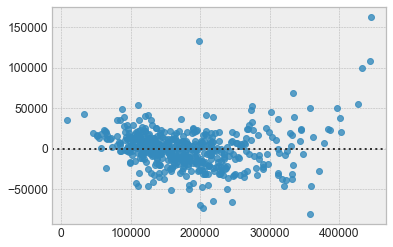

In [115]:
plt.style.use('bmh')
sns.residplot(x=pred_y_val, y=residuals,data=X_train);

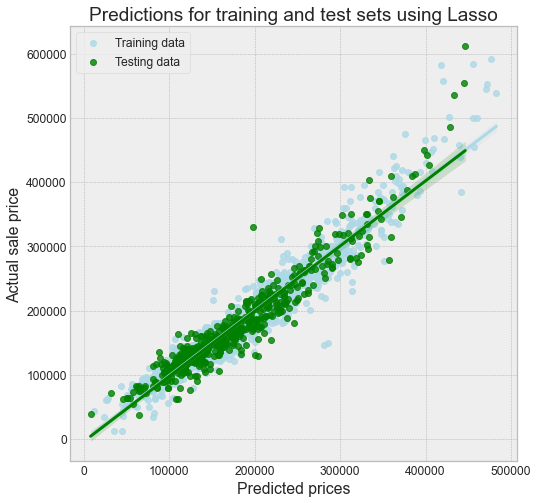

In [120]:
plt.figure(figsize=(8, 8))
plt.title("Predictions for training and test sets using Lasso")
sns.regplot(x = pred_y_train, y = y_train, data=X_train, color='LightBlue', label = "Training data")
sns.regplot(x = pred_y_val, y = y_val, data=X_val, color='Green' , label = "Testing data")
plt.xlabel("Predicted prices")
plt.ylabel("Actual sale price")
plt.legend();

The predictions for the training and test set using Lasso seem to work quite well since the R2 Val score are above 0.91. There seems to have more variance with those housing above $500,000.

### Conclusion and Recommendations

The total Sqft create the the most impact on the selling prices of the houses, followed by the overall quality. It also appears that the neighborhood the house is in may give it a premium in terms of sales price. We can also see that Age of the house, quality of the houses' external material, the quality of the kitchen, garage area are less significant but still important

Overall, the factors that the models says have an impact on its sales price are within expectations of observable reality. The model though, does give us a better sense of how important each factor is with respect to another. Lasso seem to work better then ridge for this feature selection.

The model is is now quite useful in giving the agents a rough estimate which they can give to their clients with the basis on the total floor area, overall conditions and neighborhood, garage area as a guideline. The agent can also let the clients knows that what are the other feature they can work on to use inorder to fetch a better price for their property.


Recommendations for the future model:

1. Grouping of the neighborhood into regions groups, similiar to out singapore context, the different district.
2. Further looking into the dataset and reduce more redundant features such as the ultilities, foundation, screen pouch, electricity.
3. Looking deeper identify and remove the outliers. 



<img src="../image/district.JPG" style="float: left; margin: 20px; height: 200px">